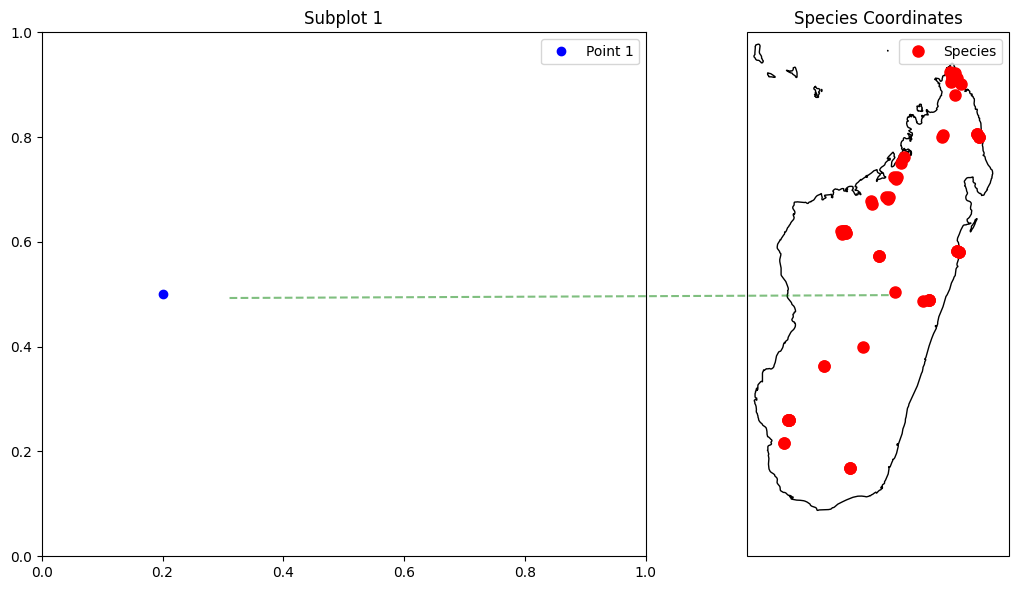

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Read GPS coordinates from CSV file
gps = pd.read_csv(r"../data/sample_coord_mada.csv", index_col=0)
gps.index.name = "ID"

# Define the extent of the map (centered around Madagascar)
extent = [43, 51, -27, -11]

# Create a new map with PlateCarree projection
fig = plt.figure(figsize=(12, 6))

# Create subplot 1
ax1 = fig.add_subplot(1, 2, 1)
x1, y1 = 0.2, 0.5  # Example point in subplot 1
ax1.plot(x1, y1, 'bo', label='Point 1')
ax1.set_title('Subplot 1')
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.legend()

# Create subplot 2 with the map plot
ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree())
ax2.set_extent(extent)

# Plot points from GPS dataframe on the map
#for index, row in gps.iterrows():
#    ax2.plot(row["longitude"], row["latitude"], 'ro', markersize=8)

# Add coastlines and country borders for context
ax2.coastlines(resolution='10m')
ax2.add_feature(cfeature.BORDERS)

ax2.set_xlabel("Longitude")
ax2.set_ylabel("Latitude")
ax2.set_title("Species Coordinates")
ax2.legend(['Species'], loc='upper right')

# Hard-code specific coordinates
longitude, latitude = 47.5, -18.9  # Example coordinates

# Transform the point coordinates from data coordinates to display coordinates, then to figure coordinates
fig_xy1 = ax1.transData.transform((x1, y1))
fig_xy1 = fig.transFigure.inverted().transform(fig_xy1)
fig_xy2 = ax2.transData.transform((longitude, latitude))
fig_xy2 = fig.transFigure.inverted().transform(fig_xy2)

# Draw the line in figure coordinates
line = plt.Line2D([fig_xy1[0], fig_xy2[0]], [fig_xy1[1], fig_xy2[1]], transform=fig.transFigure, color="green", linestyle="--", alpha=0.5)
fig.lines.append(line)


# Adjust layout and display
plt.tight_layout()
plt.show()

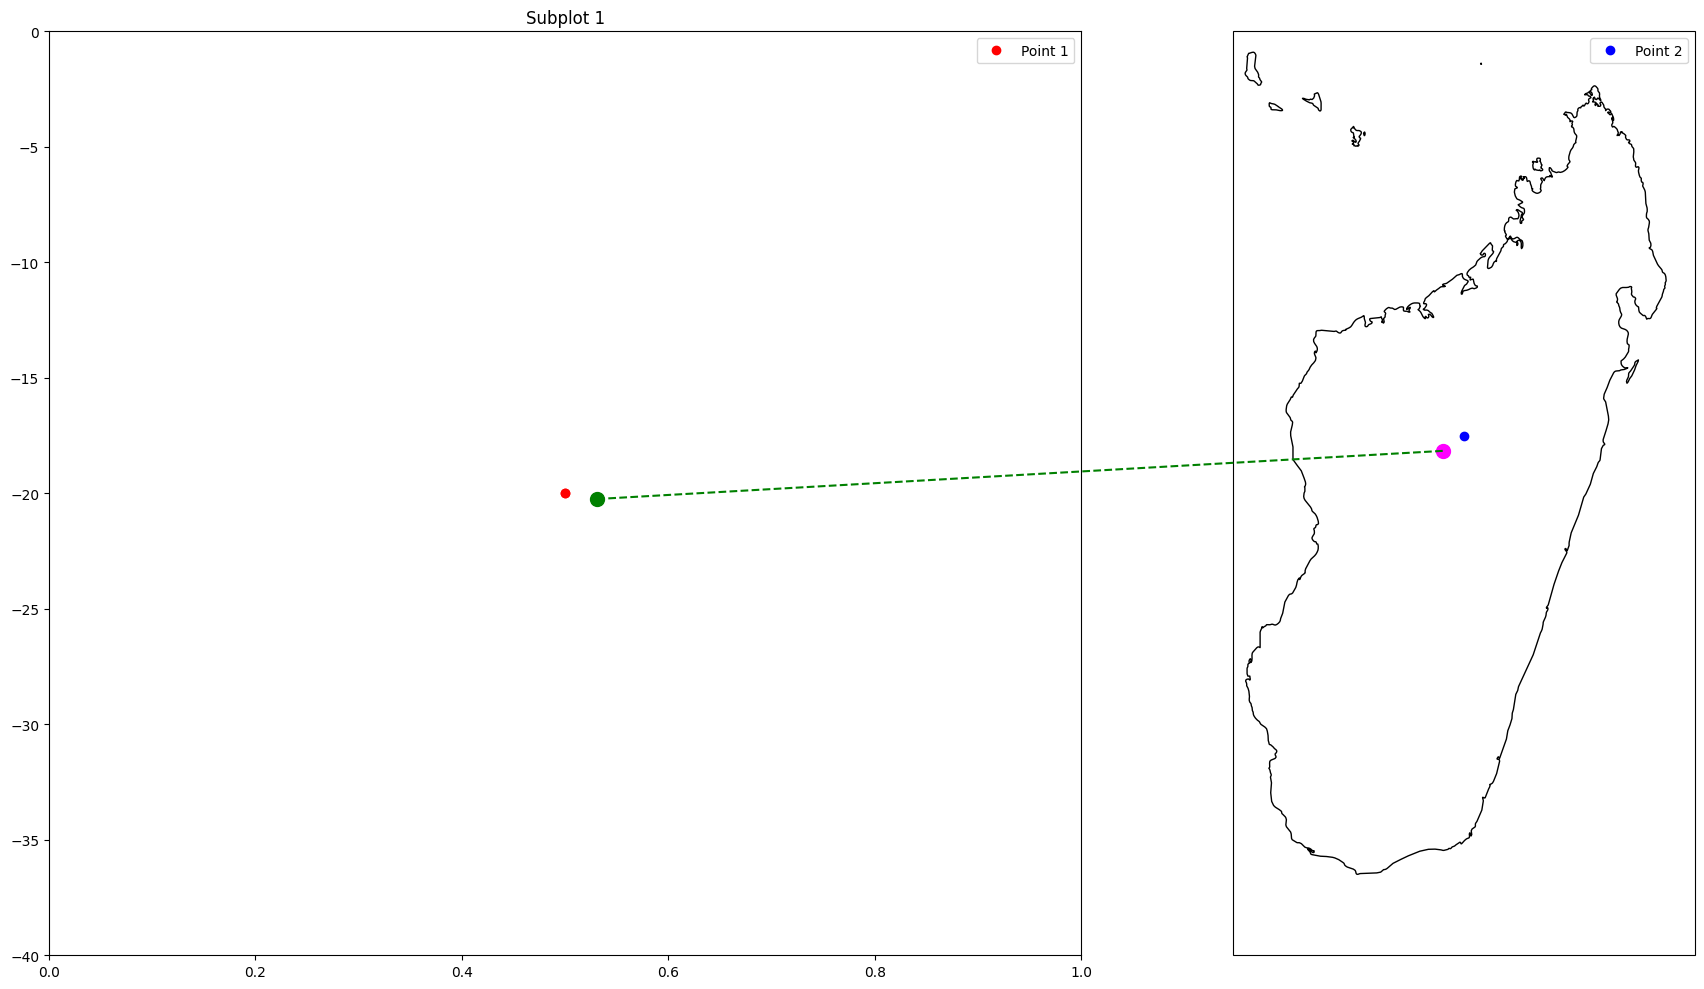

In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
from Bio import Phylo

# Load your tree
#tree = Phylo.read("../tree/phylogenetic_tree.nwk", "newick")

# Read the GPS data
gps = pd.read_csv(r'../data/sample_data_mada.csv', index_col=0)
gps.index.name = "ID"

def custom_label(clade):
    if clade.is_terminal():
        return clade.name
    else:
        return None

def calc_node_positions(tree, x_start, x_end):
    if tree.is_terminal():
        x_pos = x_start
    else:
        x_pos = (x_start + x_end) / 2
        for child in tree.clades:
            x_pos = calc_node_positions(child, x_start, x_end)
            x_start = x_pos
    tree.position = (x_pos, tree.branch_length)
    return x_pos

#calc_node_positions(tree.root, 0, 1)

extent = [43, 51, -27, -11]

fig = plt.figure(figsize=(20, 10))

# Create the tree subplot with explicit xlim and ylim
#ax_tree = fig.add_subplot(121)
#Phylo.draw(tree, do_show=False, axes=ax_tree, label_func=custom_label)
#ax_tree.set_title("Phylogenetic Tree")
#ax_tree.set_xlim(0, 1)  # Adjust xlim as needed
#ax_tree.set_ylim(0, 1)  # Adjust ylim as needed
#node_positions = {clade.name: clade.position for clade in tree.find_clades()}

# Access positions of tree nodes
#print("Position of node 'Tricalysia':", node_positions.get('Tricalysia'))

ax1 = fig.add_subplot(121)
x1, y1 = 0.5, -20  # Example point in subplot 1
ax1.plot(x1, y1, 'ro', label='Point 1')
ax1.set_xlim(0, 1)
ax1.set_ylim(-40, 0)
ax1.set_title('Subplot 1')
ax1.legend()

# Create the map subplot with explicit xlim and ylim
ax_map = fig.add_subplot(122, projection=ccrs.PlateCarree())
ax_map.set_extent(extent)
ax_map.add_feature(cfeature.COASTLINE)
ax_map.add_feature(cfeature.BORDERS, linestyle=':')
ax_map.set_xlim(43, 51)  # Adjust xlim as needed
ax_map.set_ylim(-27, -11)  # Adjust ylim as needed

# Example data points
#x1, y1 = node_positions.get('Tricalysia', (0, 0.35542))  # Default coordinates if 'Tricalysia' not found
x2, y2 = 47, -18

# Plot the points
#ax_tree.plot(x1, y1, 'ro', label='Point 1')
ax1.plot(x1, y1, 'ro', label='Point 1')
ax_map.plot(x2, y2, 'bo', label='Point 2')
ax_map.legend()

# Convert the points' coordinates from their respective axes to display coordinates
#xy1_display = ax_tree.transData.transform([x1, y1])
xy1_display = ax1.transData.transform([x1, y1])
xy2_display = ax_map.transData.transform([x2, y2])

# Convert display coordinates to figure coordinates
fig_xy1 = fig.transFigure.inverted().transform(xy1_display)
fig_xy2 = fig.transFigure.inverted().transform(xy2_display)

# Plot the points in figure coordinates for validation
point1 = plt.Line2D([fig_xy1[0]], [fig_xy1[1]], color='green', marker='o', linestyle='None', markersize=10)
point2 = plt.Line2D([fig_xy2[0]], [fig_xy2[1]], color='magenta', marker='o', linestyle='None', markersize=10)
fig.add_artist(point1)
fig.add_artist(point2)

# Draw the line in figure coordinates
line = plt.Line2D([fig_xy1[0], fig_xy2[0]], [fig_xy1[1], fig_xy2[1]], transform=fig.transFigure, color="green", linestyle="--")
fig.lines.append(line)



plt.tight_layout()
plt.show()




In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
from Bio import Phylo

# Load your tree
#tree = Phylo.read("../tree/phylogenetic_tree.nwk", "newick")

# Read the GPS data
gps = pd.read_csv(r'../data/sample_data_mada.csv', index_col=0)
gps.index.name = "ID"

def custom_label(clade):
    if clade.is_terminal():
        return clade.name
    else:
        return None

def calc_node_positions(tree, x_start, x_end):
    if tree.is_terminal():
        x_pos = x_start
    else:
        x_pos = (x_start + x_end) / 2
        for child in tree.clades:
            x_pos = calc_node_positions(child, x_start, x_end)
            x_start = x_pos
    tree.position = (x_pos, tree.branch_length)
    return x_pos

#calc_node_positions(tree.root, 0, 1)

extent = [43, 51, -27, -11]

fig = plt.figure(figsize=(20, 10))

# Create the tree subplot with explicit xlim and ylim
#ax_tree = fig.add_subplot(121)
#Phylo.draw(tree, do_show=False, axes=ax_tree, label_func=custom_label)
#ax_tree.set_title("Phylogenetic Tree")
#ax_tree.set_xlim(0, 1)  # Adjust xlim as needed
#ax_tree.set_ylim(0, 1)  # Adjust ylim as needed
#node_positions = {clade.name: clade.position for clade in tree.find_clades()}

# Access positions of tree nodes
#print("Position of node 'Tricalysia':", node_positions.get('Tricalysia'))

ax1 = fig.add_subplot(121)
x1, y1 = 0.5, -20  # Example point in subplot 1
ax1.plot(x1, y1, 'ro', label='Point 1')
ax1.set_xlim(0, 1)
ax1.set_ylim(-40, 0)
ax1.set_title('Subplot 1')
ax1.legend()

# Create the map subplot with explicit xlim and ylim
ax_map = fig.add_subplot(122, projection=ccrs.PlateCarree())
ax_map.set_extent(extent)
ax_map.add_feature(cfeature.COASTLINE)
ax_map.add_feature(cfeature.BORDERS, linestyle=':')
ax_map.set_xlim(43, 51)  # Adjust xlim as needed
ax_map.set_ylim(-27, -11)  # Adjust ylim as needed

# Example data points
#x1, y1 = node_positions.get('Tricalysia', (0, 0.35542))  # Default coordinates if 'Tricalysia' not found
x2, y2 = 47, -18

# Plot the points
#ax_tree.plot(x1, y1, 'ro', label='Point 1')
ax1.plot(x1, y1, 'ro', label='Point 1')
ax_map.plot(x2, y2, 'bo', label='Point 2')
ax_map.legend()

# Convert the points' coordinates from their respective axes to display coordinates
#xy1_display = ax_tree.transData.transform([x1, y1])
xy1_display = ax1.transData.transform([x1, y1])
xy2_display = ax_map.transData.transform([x2, y2])

# Convert display coordinates to figure coordinates
fig_xy1 = fig.transFigure.inverted().transform(xy1_display)
fig_xy2 = fig.transFigure.inverted().transform(xy2_display)

# Plot the points in figure coordinates for validation
point1 = plt.Line2D([fig_xy1[0]], [fig_xy1[1]], color='green', marker='o', linestyle='None', markersize=10)
point2 = plt.Line2D([fig_xy2[0]], [fig_xy2[1]], color='magenta', marker='o', linestyle='None', markersize=10)
fig.add_artist(point1)
fig.add_artist(point2)

# Draw the line in figure coordinates
#line = plt.Line2D([fig_xy1[0], fig_xy2[0]], [fig_xy1[1], fig_xy2[1]], transform=fig.transFigure, color="green", linestyle="--")
#fig.lines.append(line)

# ------------------------------------------
# ------------  Connection patch -----------
# ------------------------------------------

xyA = (0, 1)  # Point in the First subplot
# xyB = (2, 2)  # Point in the Second subplot
xyB = (47.781762,-14.79531) # Point in the Second subplot
xyB = (49.39833,-12.388317) # Point in the Second subplot

# Create a ConnectionPatch (green)
con = ConnectionPatch(
    xyA=point1, coordsA="data",
    xyB=point2, coordsB="data",
    axesA=ax1, axesB=ax_map,
    color="green", linewidth=1, linestyle="--",
    zorder=2
)

# Add the ConnectionPatch to the Cartesian subplot's axes
fig.add_artist(con)


plt.tight_layout()
plt.show()




TypeError: iteration over a 0-d array

<Figure size 2000x1000 with 2 Axes>

x1, y1:  0.5 0.5
display_xy1:  [361.36363636 297.        ]
fig_xy1:  [0.30113636 0.495     ]
display_xy2:  [909.94537841 418.41042375]
fig_xy2:  [0.75828782 0.69735071] --> Correct


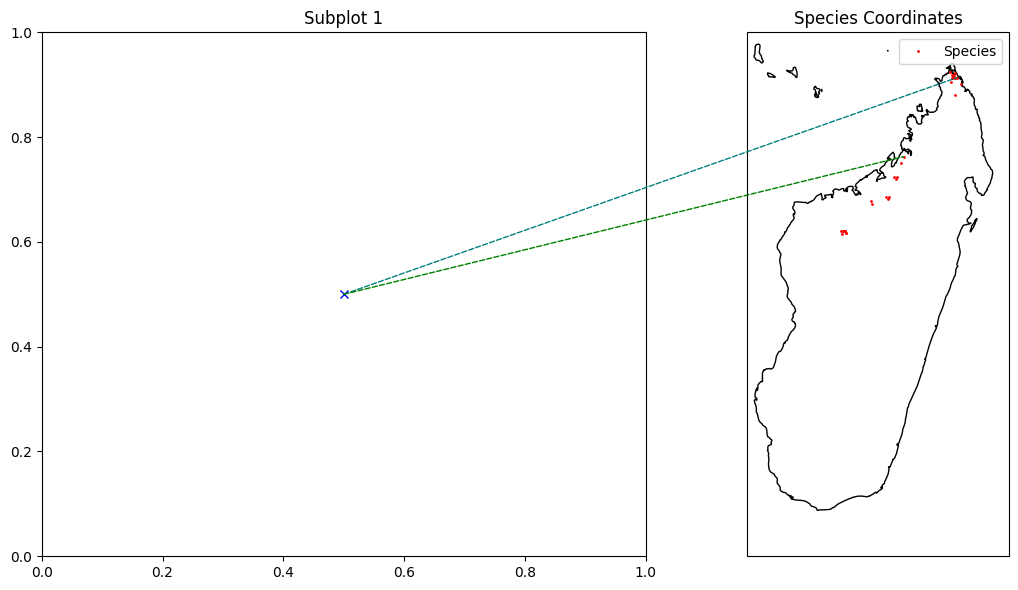

'\n# Create subplot 1\nax1 = fig.add_subplot(1, 2, 1)\n\nx1, y1 = 0.5, 0.5  # Example point in subplot 1\n\nax1.plot(x1, y1, \'bx\', label=\'Point 1\')\nax1.set_title(\'Subplot 1\')\nax1.set_xlim(0, 1)\nax1.set_ylim(0, 1)\n# ax1.legend()\n\n# Transform the point coordinates from data coordinates to display coordinates, then to figure coordinates\nprint(\'x1, y1: \', x1, y1)\ndisplay_xy1 = ax1.transData.transform((x1, y1))\nprint(\'display_xy1: \', display_xy1)\nfig_xy1 = fig.transFigure.inverted().transform(display_xy1)\nprint(\'fig_xy1: \', fig_xy1)\n\n# --------------------------------------\n# ------------  GRAPH MAP --------------\n# --------------------------------------\n\n# Create subplot 2 with the map plot\nax2 = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree()) # PROBLEM HERE\n# Define the extent of the map (centered around Madagascar)\nextent = [43, 51, -27, -11]\nax2.set_extent(extent)\n\n# Plot points from GPS dataframe on the map\nfor index, row in gps.iterrows():\n

<Figure size 1200x600 with 0 Axes>

In [9]:
# Create a new map with PlateCarree projection
fig = plt.figure(figsize=(12, 6))

# --------------------------------------
# ------------  Phylogenetic MAP -------
# --------------------------------------

# Create subplot 1
ax1 = fig.add_subplot(1, 2, 1)

x1, y1 = 0.5, 0.5  # Example point in subplot 1

ax1.plot(x1, y1, 'bx', label='Point 1')
ax1.set_title('Subplot 1')
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
# ax1.legend()

# Transform the point coordinates from data coordinates to display coordinates, then to figure coordinates
print('x1, y1: ', x1, y1)
display_xy1 = ax1.transData.transform((x1, y1))
print('display_xy1: ', display_xy1)
fig_xy1 = fig.transFigure.inverted().transform(display_xy1)
print('fig_xy1: ', fig_xy1)

# --------------------------------------
# ------------  GRAPH MAP --------------
# --------------------------------------

# Create subplot 2 with the map plot
ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree()) # PROBLEM HERE
# Define the extent of the map (centered around Madagascar)
extent = [43, 51, -27, -11]
ax2.set_extent(extent)

# Plot points from GPS dataframe on the map
for index, row in gps.iterrows():
    ax2.plot(row["longitude"], row["latitude"], 'ro', markersize=1)

# Add coastlines and country borders for context
ax2.coastlines(resolution='10m')
ax2.add_feature(cfeature.BORDERS)

ax2.set_xlabel("Longitude")
ax2.set_ylabel("Latitude")
ax2.set_title("Species Coordinates")
ax2.legend(['Species'], loc='upper right')


# --------------------------------------
# ------------  Line mapping -----------
# --------------------------------------

# Hard-code specific coordinates
# longitude, latitude = 47.5, -18.9  # Example coordinates
# longitude, latitude = 47.781762,-14.79531  # Example coordinates (L31, C_perrieri_A12,47.781762,-14.79531)
longitude, latitude = 47.781762,-14.79531  # Example coordinates (Single, C_bissetiae,47.590008,-15.407416)
display_xy2 = ax2.transData.transform((longitude, latitude))
print('display_xy2: ', display_xy2)
# print(fig_xy2)
fig_xy2 = fig.transFigure.inverted().transform(display_xy2)
print('fig_xy2: ', fig_xy2, '--> Correct')



# ------------------------------------------
# ------------  Connection patch -----------
# ------------------------------------------

xyA = (0.5, 0.5)  # Point in the First subplot
# xyB = (2, 2)  # Point in the Second subplot
xyB = (47.781762,-14.79531) # Point in the Second subplot
xyB1 = (49.39833,-12.388317) # Point in the Second subplot

# Create a ConnectionPatch (green)
con = ConnectionPatch(
    xyA=xyA, coordsA="data",
    xyB=xyB, coordsB="data",
    axesA=ax1, axesB=ax2,
    color="green", linewidth=1, linestyle="--",
    zorder=2
)

# Add the ConnectionPatch to the Cartesian subplot's axes
fig.add_artist(con)

xyA = (0.5, 0.5)  # Point in the First subplot
# Create a ConnectionPatch (teal)
con = ConnectionPatch(
    xyA=xyA, coordsA="data",
    xyB=xyB1, coordsB="data",
    axesA=ax1, axesB=ax2,
    color="teal", linewidth=1, linestyle="--"
)

fig.add_artist(con)

# Adjust layout and display
plt.tight_layout()
plt.show()# Create a new map with PlateCarree projection
#fig = plt.figure(figsize=(12, 6))

# --------------------------------------
# ------------  Phylogenetic MAP -------
# --------------------------------------
'''
# Create subplot 1
ax1 = fig.add_subplot(1, 2, 1)

x1, y1 = 0.5, 0.5  # Example point in subplot 1

ax1.plot(x1, y1, 'bx', label='Point 1')
ax1.set_title('Subplot 1')
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
# ax1.legend()

# Transform the point coordinates from data coordinates to display coordinates, then to figure coordinates
print('x1, y1: ', x1, y1)
display_xy1 = ax1.transData.transform((x1, y1))
print('display_xy1: ', display_xy1)
fig_xy1 = fig.transFigure.inverted().transform(display_xy1)
print('fig_xy1: ', fig_xy1)

# --------------------------------------
# ------------  GRAPH MAP --------------
# --------------------------------------

# Create subplot 2 with the map plot
ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree()) # PROBLEM HERE
# Define the extent of the map (centered around Madagascar)
extent = [43, 51, -27, -11]
ax2.set_extent(extent)

# Plot points from GPS dataframe on the map
for index, row in gps.iterrows():
    ax2.plot(row["longitude"], row["latitude"], 'ro', markersize=1)

# Add coastlines and country borders for context
ax2.coastlines(resolution='10m')
ax2.add_feature(cfeature.BORDERS)

ax2.set_xlabel("Longitude")
ax2.set_ylabel("Latitude")
ax2.set_title("Species Coordinates")
ax2.legend(['Species'], loc='upper right')


# --------------------------------------
# ------------  Line mapping -----------
# --------------------------------------

# Hard-code specific coordinates
# longitude, latitude = 47.5, -18.9  # Example coordinates
# longitude, latitude = 47.781762,-14.79531  # Example coordinates (L31, C_perrieri_A12,47.781762,-14.79531)
longitude, latitude = 47.781762,-14.79531  # Example coordinates (Single, C_bissetiae,47.590008,-15.407416)
display_xy2 = ax2.transData.transform((longitude, latitude))
print('display_xy2: ', display_xy2)
# print(fig_xy2)
fig_xy2 = fig.transFigure.inverted().transform(display_xy2)
print('fig_xy2: ', fig_xy2, '--> Correct')



# ------------------------------------------
# ------------  Connection patch -----------
# ------------------------------------------

xyA = (0.5, 0.5)  # Point in the First subplot
# xyB = (2, 2)  # Point in the Second subplot
xyB = (47.781762,-14.79531) # Point in the Second subplot
xyB1 = (49.39833,-12.388317) # Point in the Second subplot

# Create a ConnectionPatch (green)
con = ConnectionPatch(
    xyA=xyA, coordsA="data",
    xyB=xyB, coordsB="data",
    axesA=ax1, axesB=ax2,
    color="green", linewidth=1, linestyle="--",
    zorder=2
)

# Add the ConnectionPatch to the Cartesian subplot's axes
fig.add_artist(con)

#xyA = (1, 0)  # Point in the First subplot
# Create a ConnectionPatch (teal)
con = ConnectionPatch(
    xyA=xyA, coordsA="data",
    xyB=xyB1, coordsB="data",
    axesA=ax1, axesB=ax2,
    color="teal", linewidth=1, linestyle="--"
)

fig.add_artist(con)

# Adjust layout and display
plt.tight_layout()
plt.show()
'''

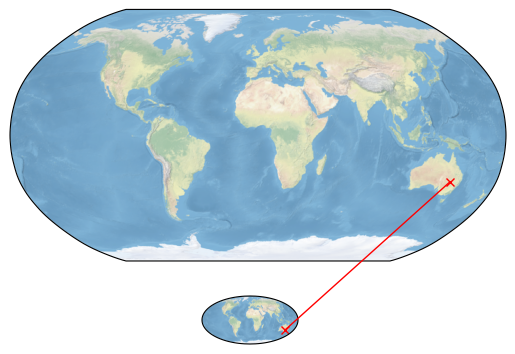

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cartopy.crs as ccrs

fig = plt.figure()

projA = ccrs.Robinson()
projB = ccrs.Mollweide()

pc = ccrs.PlateCarree()

ax = plt.subplot(projection=projA)

lon,lat = 145,-30

ax.stock_img()
ax.plot(lon,lat, marker='x', color='r', transform=pc)

ax2 = fig.add_axes([0.1,0.06,0.8,0.1], projection=projB)
ax2.stock_img()
ax2.plot(lon,lat, marker='x', color='r', transform=pc)

xyA = projA.transform_point(lon, lat, pc)
xyB = projB.transform_point(lon, lat, pc)

# line between axes
con = patches.ConnectionPatch(
    xyA=xyA, xyB=xyB, coordsA=ax.transData, coordsB=ax2.transData, color='r')

fig.add_artist(con)

plt.show()